In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carga
df = pd.read_csv("../data/processed/inegi_contexto_municipal.csv")

print("Shape:", df.shape)
df.head()


Shape: (445, 9)


,municipio,periodo,grado_promedio_escolaridad,poblacion_asiste_escuela,poblacion_total,porcentaje_alfabetas,total_viviendas_habitadas,viviendas_con_automovil,viviendas_con_internet
0,Aconchi,1995,NaN,NaN,2264.0,NaN,511.0,NaN,NaN
1,Aconchi,2000,6.900000,556.0,2420.0,94.758785,578.0,NaN,NaN
2,Aconchi,2005,7.400000,580.0,2452.0,NaN,612.0,NaN,NaN
3,Aconchi,2010,7.810000,667.0,2637.0,95.570000,703.0,NaN,NaN
4,Aconchi,2015,8.242048,NaN,NaN,96.029777,795.0,NaN,24.654088


In [7]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   municipio                   445 non-null    object 
 1   periodo                     445 non-null    int64  
 2   grado_promedio_escolaridad  364 non-null    float64
 3   poblacion_asiste_escuela    292 non-null    float64
 4   poblacion_total             373 non-null    float64
 5   porcentaje_alfabetas        292 non-null    float64
 6   total_viviendas_habitadas   437 non-null    float64
 7   viviendas_con_automovil     73 non-null     float64
 8   viviendas_con_internet      145 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 31.4+ KB


,count,mean,std,min,25%,50%,75%,max
periodo,445.0,2006.395506,12.253368,1910.000000,2000.000000,2005.000000,2015.000000,2.020000e+03
grado_promedio_escolaridad,364.0,7.786657,1.221781,4.700000,6.897500,7.703653,8.605000,1.129539e+01
poblacion_asiste_escuela,292.0,19139.828767,85781.531453,49.000000,304.000000,813.000000,4150.000000,7.576360e+05
poblacion_total,373.0,92318.396783,359337.484109,242.000000,1407.000000,4187.000000,21813.000000,2.944840e+06
porcentaje_alfabetas,292.0,94.954060,6.194507,0.000000,94.384906,95.839901,97.071294,9.892872e+01
total_viviendas_habitadas,437.0,19285.528604,85677.586078,82.000000,407.000000,968.000000,4584.000000,8.763330e+05
viviendas_con_automovil,73.0,63.580154,10.826368,31.819820,57.983193,65.869565,70.567376,8.056180e+01
viviendas_con_internet,145.0,30.857758,19.306993,0.759013,15.300546,28.182807,46.328298,7.477960e+01


In [8]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'missing': missing, 'missing_pct': missing_pct})
missing_df[missing_df['missing'] > 0].head(20)


,missing,missing_pct
viviendas_con_automovil,372,83.595506
viviendas_con_internet,300,67.415730
poblacion_asiste_escuela,153,34.382022
porcentaje_alfabetas,153,34.382022
grado_promedio_escolaridad,81,18.202247
poblacion_total,72,16.179775
total_viviendas_habitadas,8,1.797753


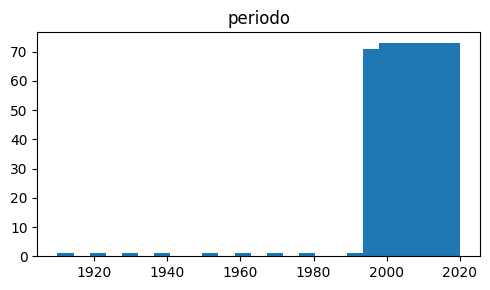

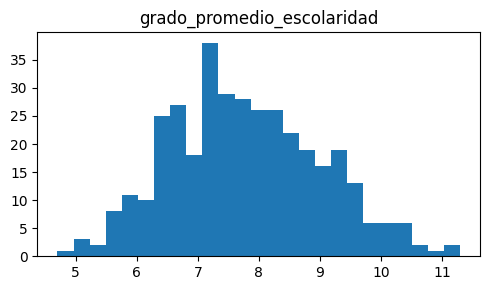

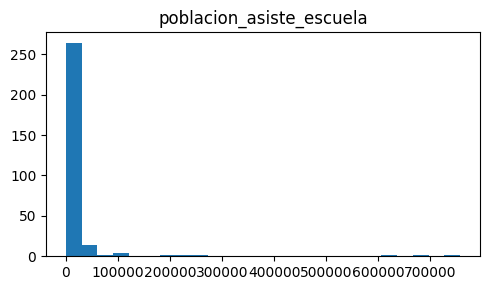

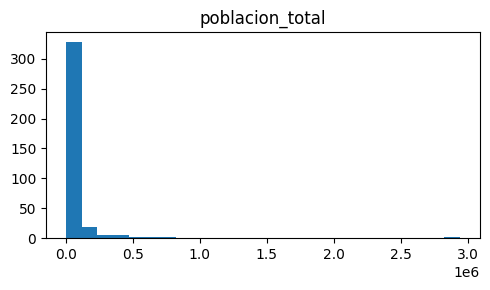

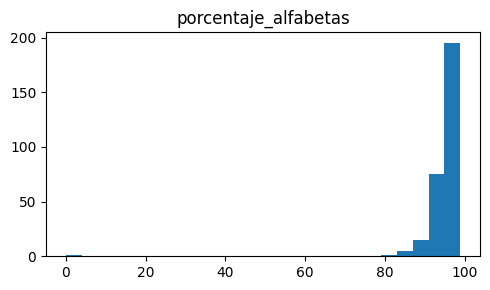

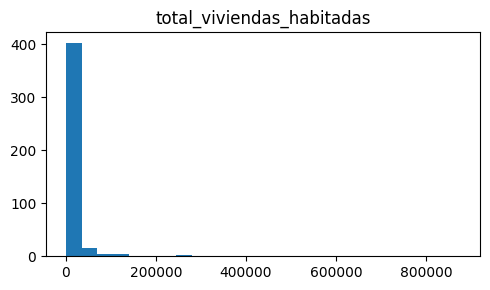

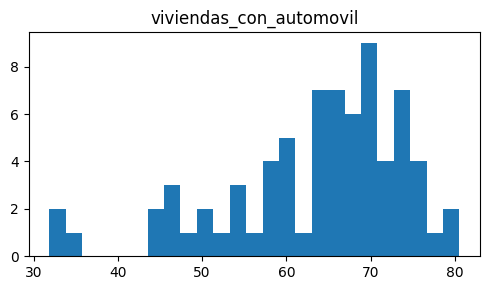

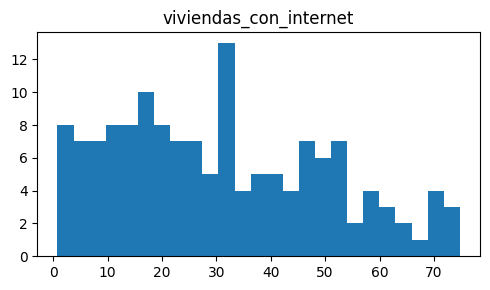

In [9]:
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols[:8]:  # puedes ajustar cuántas graficas
    plt.figure(figsize=(5,3))
    plt.hist(df[col].dropna(), bins=25)
    plt.title(col)
    plt.tight_layout()
    plt.show()


In [10]:
iqr_outliers = {}
for col in num_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    iqr_outliers[col] = ((df[col] < lower) | (df[col] > upper)).sum()

pd.Series(iqr_outliers).sort_values(ascending=False).head(10)


total_viviendas_habitadas     78
poblacion_total               68
poblacion_asiste_escuela      52
porcentaje_alfabetas          19
periodo                        7
viviendas_con_automovil        3
grado_promedio_escolaridad     1
viviendas_con_internet         0
dtype: int64

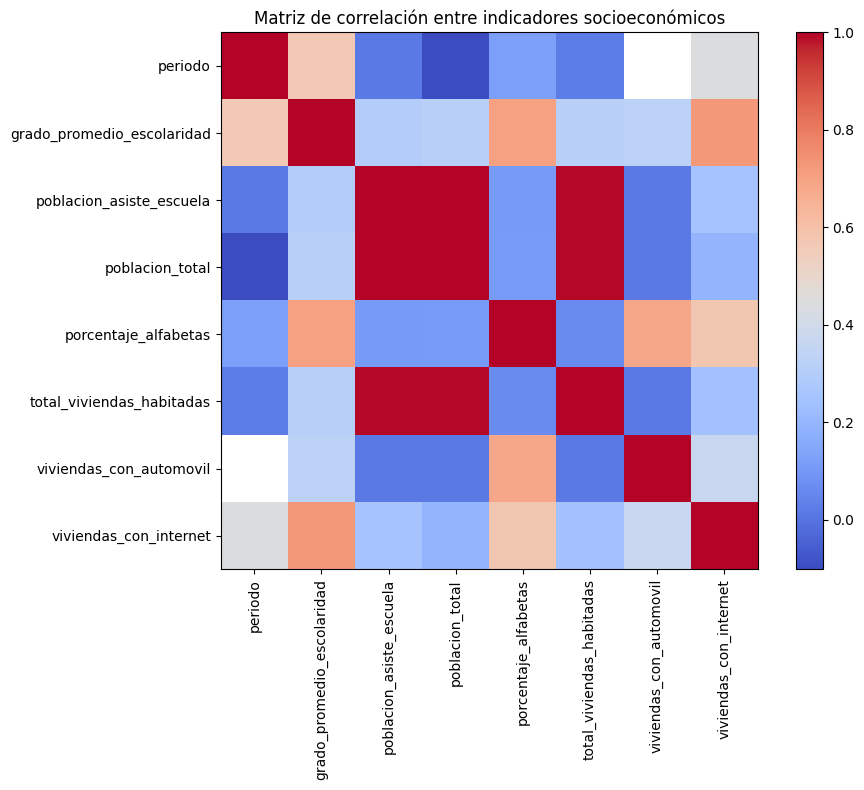

In [11]:
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.title("Matriz de correlación entre indicadores socioeconómicos")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout()
plt.show()


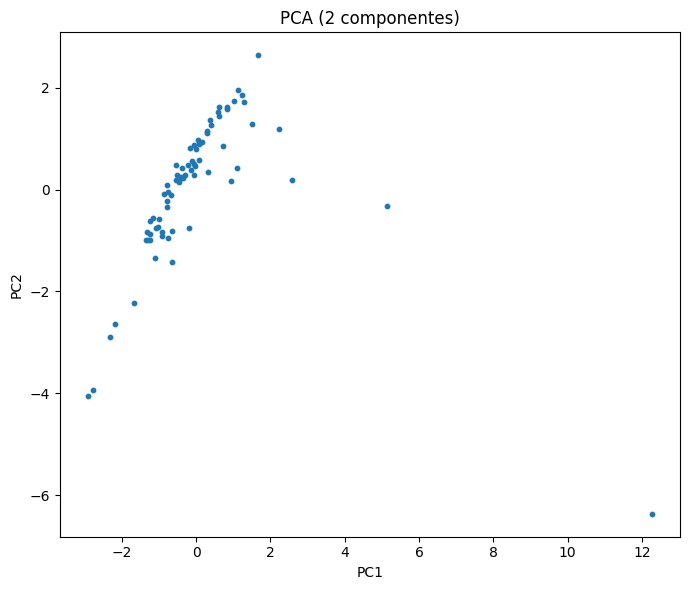

Varianza explicada: [0.50522489 0.30653648]


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[num_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=10)
plt.title("PCA (2 componentes)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

print("Varianza explicada:", pca.explained_variance_ratio_)


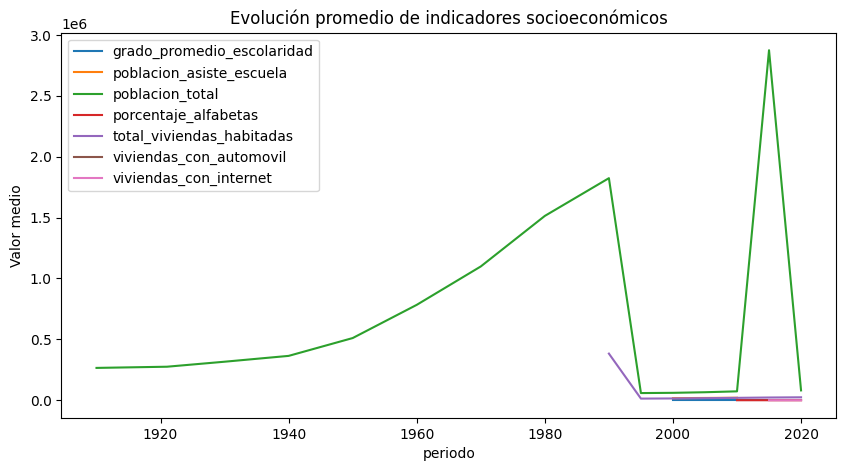

In [13]:
if "periodo" in df.columns:
    df.groupby("periodo").mean(numeric_only=True).plot(figsize=(10,5))
    plt.title("Evolución promedio de indicadores socioeconómicos")
    plt.ylabel("Valor medio")
    plt.show()
